# Purple Cobras Python Group Project - Des Moines Housing Prices

## Team Members
- Nicole Litchkey
- Brandy Graham
- Michael Hanson

## Problem
How can you tell if the house you are interested in purchasing is being sold at a fair and reasonble price? For many home buyers it is often difficult to tell. Does the asking price for the home addequately reflect the home's worth? Does it match other similar home's sales price based on current market conditions? These are a few questions that should be answered before placing an offer on the desired home. 

## Goal
Our goal is to create a python model/app where a user provides housing information (such as the house's quality rating, square feet of finished space, neighborhood it is located in, materials used to build it, etc.) to our model. The model will then predict what the house should most likely be priced at. The user should then be able to determine whether the house they are attempting to purchase is at a marketable price. 

## Data
Data will be taken from the Polk County Assessor website: http://www.assess.co.polk.ia.us/web/exports/res/sales/2019/DM.txt
We will be using the 2019 dataset so that we are building a model on the most recent housing price trends. We want this model to reflect the current housing market and not be affected by previous years housing sales.

In [1]:
#We will use the urllib module to pull the txt file from the polk county assessor website
import urllib.request
...
url = 'http://www.assess.co.polk.ia.us/web/exports/res/sales/2019/DM.txt'
response = urllib.request.urlopen(url)
data = response.read()
text = data.decode('utf-8') 
print(text)

jurisdiction	nbhd	dp	gp	sale_date	book	pg	instrument	price	address	zip	seller	buyer	land_full	bldg_full	total_full	quality1	quality2	included_dps	land_sf	land_acres	occupancy	residence_type	bldg_style	exterior_wall_type	percent_brick	roof_type	roof_material	main_living_area	upper_living_area	fin_attic_area	total_living_area	unfin_attic_area	foundation	basement_area	fin_bsmt_area_tot	bsmt_walkout	bsmt_gar_capacity	att_garage_area	garage_brick	open_porch_area	enclose_porch_area	patio_area	deck_area	canopy_area	veneer_area	carport_area	bathrooms	toilet_rooms	extra_fixtures	whirlpools	hottubs	saunas	fireplaces	bedrooms	rooms	families	year_built	year_remodel	eff_year_built	condition	grade	heating	air_conditioning	percent_complete	detached_structs	analysis_quality	initial_entry_date	platname	begin_of_legal	school_district	fin_bsmt_area1	fin_bsmt_qual1	fin_bsmt_area2	fin_bsmt_qual2
DES MOINES	DM27	"01000014000000"	"782416455019"	06/30/2019	17387	631	Contract	104000	709 BOULDER AVE	50315	NIGRO

## Data Exploration and Cleaning
Next, we put the data into a pandas dataframe so it was easier to work with.

In [2]:
import pandas as pd
from urllib.request import urlopen

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

url ='http://www.assess.co.polk.ia.us/web/exports/res/sales/2019/DM.txt'
df = pd.read_csv(url, sep='\t')

df.shape
df.columns
df.head()

,jurisdiction,nbhd,dp,gp,sale_date,book,pg,instrument,price,address,zip,seller,buyer,land_full,bldg_full,total_full,quality1,quality2,included_dps,land_sf,land_acres,occupancy,residence_type,bldg_style,exterior_wall_type,percent_brick,roof_type,roof_material,main_living_area,upper_living_area,fin_attic_area,total_living_area,unfin_attic_area,foundation,basement_area,fin_bsmt_area_tot,bsmt_walkout,bsmt_gar_capacity,att_garage_area,garage_brick,open_porch_area,enclose_porch_area,patio_area,deck_area,canopy_area,veneer_area,carport_area,bathrooms,toilet_rooms,extra_fixtures,whirlpools,hottubs,saunas,fireplaces,bedrooms,rooms,families,year_built,year_remodel,eff_year_built,condition,grade,heating,air_conditioning,percent_complete,detached_structs,analysis_quality,initial_entry_date,platname,begin_of_legal,school_district,fin_bsmt_area1,fin_bsmt_qual1,fin_bsmt_area2,fin_bsmt_qual2
0,DES MOINES,DM27,1000014000000,782416455019,06/30/2019,17387,631,Contract,104000,709 BOULDER AVE,50315.0,NIGRO FAMILY TRUST,"COSIMO, NINA M",21400,110200,131600,Arms Length,Arms Length,NaN,7425,0.170,Single Family,1 Story,Ranch,Wood Siding,0.0,Hip,Asphalt Shingle,1332.0,0.0,0.0,1332.0,0.0,Concrete Block,1332.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,1.0,1955.0,NaN,NaN,Normal,4+05,Gas Forced Air,100.0,NaN,GAR/400,Good,07/18/2019,BAGG PLACE,E 75F W 573F LOT 2,Des Moines,0.0,NaN,0.0,NaN
1,DES MOINES,DM27,1000031001004,782416455028,06/18/2019,17377,136,Deed,124560,3141 SW 7TH ST,50315.0,NIGRO FAMILY TRUST,8035 DEVELOPMENT LLC,23300,155300,178600,Arms Length,Arms Length,NaN,8330,0.191,Single Family,Split Level,4 Split,Wood Siding,0.0,Gable,Asphalt Shingle,1274.0,912.0,0.0,2186.0,0.0,Concrete Block,514.0,0.0,0.0,0.0,528.0,0.0,0.0,0.0,0.0,512.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,1.0,1982.0,NaN,NaN,Normal,4+10,Gas Forced Air,100.0,NaN,NaN,Good,06/26/2019,BAGG PLACE,S 31.25F E 43.5F LT 8 &,Des Moines,0.0,NaN,0.0,NaN
2,DES MOINES,DM27,1000031001004,782416455028,06/18/2019,17379,599,Deed,136000,3141 SW 7TH ST,50315.0,8035 DEVELOPMENT LLC,WRAPID REAL ESTATE LLC,23300,155300,178600,Arms Length,Arms Length,NaN,8330,0.191,Single Family,Split Level,4 Split,Wood Siding,0.0,Gable,Asphalt Shingle,1274.0,912.0,0.0,2186.0,0.0,Concrete Block,514.0,0.0,0.0,0.0,528.0,0.0,0.0,0.0,0.0,512.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,1.0,1982.0,NaN,NaN,Normal,4+10,Gas Forced Air,100.0,NaN,NaN,Good,07/01/2019,BAGG PLACE,S 31.25F E 43.5F LT 8 &,Des Moines,0.0,NaN,0.0,NaN
3,DES MOINES,DM27,1000033003000,782416455032,01/08/2019,17208,468,Deed,132500,3144 SW 6TH ST,50315.0,"SOLIS, MOLLY","BURGART, RONALD G.",21400,98200,119600,Arms Length,Arms Length,NaN,7416,0.170,Single Family,2 Stories,Conventional,Metal Siding,0.0,Gambrel,Asphalt Shingle,812.0,560.0,0.0,1372.0,0.0,Masonry,812.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,1.0,1910.0,2013.0,1935.0,Normal,4+00,Gas Forced Air,100.0,NaN,GAR/480,Good,01/11/2019,BAGG PLACE,-EX W 75F- & -EX IREG,Des Moines,0.0,NaN,0.0,NaN
4,DES MOINES,DM27,1000033003000,782416455032,10/02/2019,17530,707,Deed,65340,3144 SW 6TH ST,50315.0,"LANDWIER, JESSICA L","BURGART, RONALD J.",21400,98200,119600,Quit Claim,Partial Interest,NaN,7416,0.170,Single Family,2 Stories,Conventional,Metal Siding,0.0,Gambrel,Asphalt Shingle,812.0,560.0,0.0,1372.0,0.0,Masonry,812.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,1.0,1910.0,2013.0,1935.0,Normal,4+00,Gas Forced Air,100.0,NaN,GAR/480,Bad,10/08/2019,BAGG PLACE,-EX W 75F- & -EX IREG,Des Moines,0.0,NaN,0.0,NaN


Next we wanted to see some basic summary statistics about each column, so we used the describe() method to print the info.

In [3]:
df.describe()

,dp,gp,book,pg,price,zip,land_full,bldg_full,total_full,land_sf,land_acres,percent_brick,main_living_area,upper_living_area,fin_attic_area,total_living_area,unfin_attic_area,basement_area,fin_bsmt_area_tot,bsmt_walkout,bsmt_gar_capacity,att_garage_area,garage_brick,open_porch_area,enclose_porch_area,patio_area,deck_area,canopy_area,veneer_area,carport_area,bathrooms,toilet_rooms,extra_fixtures,whirlpools,hottubs,saunas,fireplaces,bedrooms,rooms,families,year_built,year_remodel,eff_year_built,air_conditioning,percent_complete,fin_bsmt_area1,fin_bsmt_area2
count,3.536000e+03,3.536000e+03,3536.000000,3536.000000,3.536000e+03,3513.000000,3536.000000,3.536000e+03,3.536000e+03,3.536000e+03,3536.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.000000,3296.00000,3296.000000,3296.0,3296.000000,3225.000000,3231.000000,3296.000000,3296.000000,428.000000,636.000000,3296.000000,77.000000,3296.000000,3296.000000
mean,7.495403e+12,7.877428e+11,17356.037330,505.100962,1.459754e+05,50314.367492,26682.081448,1.095184e+05,1.362005e+05,1.084983e+04,0.249103,8.661711,978.937500,195.950243,46.567961,1221.455097,14.222694,785.518811,147.492112,1.070388,0.080400,86.096481,1.548847,35.763046,40.641383,40.606493,85.458738,5.980583,35.561286,2.755461,1.368629,0.258192,0.192658,0.01426,0.000607,0.0,0.310983,2.735194,5.405138,1.032767,1947.578580,1998.600467,1955.040881,82.556129,65.454545,146.566141,0.925971
std,3.530419e+12,4.980827e+09,286.191301,285.495388,9.972991e+04,5.643968,15822.714792,7.327941e+04,8.468887e+04,3.821148e+04,0.877214,27.263263,323.546595,365.010261,122.464534,506.475479,68.061729,388.911201,267.733681,6.396311,0.355189,191.070006,12.227213,71.450347,80.045928,111.541475,132.484104,36.242811,108.416355,27.927844,0.593622,0.467869,0.497844,0.12111,0.024629,0.0,0.536453,0.788380,1.389999,0.178053,32.197784,17.651232,21.518823,37.909483,18.248681,265.734633,18.468707
min,1.000014e+12,7.823051e+11,1353.000000,1.000000,0.000000e+00,50047.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,1.000000,3.000000,1.000000,1865.000000,1930.000000,1886.000000,0.000000,30.000000,0.000000,0.000000
25%,6.000713e+12,7.824202e+11,17280.000000,258.000000,8.900000e+04,50311.000000,17200.000000,6.740000e+04,8.657500e+04,6.600000e+03,0.152000,0.000000,780.000000,0.000000,0.000000,888.000000,0.000000,624.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,2.000000,5.000000,1.000000,1921.000000,1991.750000,1940.000000,100.000000,50.000000,0.000000,0.000000
50%,8.005241e+12,7.923273e+11,17355.500000,510.500000,1.366500e+05,50315.000000,23700.000000,1.013000e+05,1.258000e+05,7.850000e+03,0.180000,0.000000,916.000000,0.000000,0.000000,1102.000000,0.000000,816.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,3.000000,5.000000,1.000000,1949.000000,2001.500000,1956.000000,100.000000,70.000000,0.000000,0.000000
75%,1.001031e+13,7.924264e+11,17439.000000,751.000000,1.789175e+05,50317.000000,34625.000000,1.351000e+05,1.673250e+05,1.040000e+04,0.239000,0.000000,1102.000000,322.500000,0.000000,1432.000000,0.000000,988.000000,300.000000,0.000000,0.000000,0.000000,0.000000,42.000000,55.250000,0.000000,144.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.0,1.000000,3.000000,6.000000,1.000000,1964.000000,2013.000000,1966.000000,100.000000,80.000000,295.500

Many of the columns contain data that would not provide useful information or contained data that the average user would not know (For example, the quality rating of the home on a scale of 1 to 10). So the next step we took was to remove them. Used this form page, http://web.assess.co.polk.ia.us/cgi-bin/web/tt/form.cgi?tt=rsaleform, to help figure out what certain columns meant

In [4]:
df.info()
del df["jurisdiction"] #since they are all equal to Des Moines
del df["dp"] #user wouldn't know this information
del df["gp"] #user wouldn't know this information
del df["sale_date"]# don't really care (we're just looking at 2019)
del df["book"] # this is for record keeping in the polk county assessors office
del df["pg"] # also for record keeping 
del df["instrument"] #just says how the individual owns the property 
del df["bldg_style"] # another column covers this 
del df["address"] #the nbhd (neighborhood) will cover this
del df["seller"] # doesn't matter who sells the house
del df["buyer"] # doesn't matter who buys the house
del df["land_full"] # the end user won't know this
del df["bldg_full"] # the end user won't know this
del df["total_full"] # the end user won't know this
del df["quality1"] # the end user won't know this
del df["quality2"] # the end user won't know this
del df["included_dps"] # contains practically no data
del df["land_sf"] # there is an acres column
del df["roof_type"] # the average end user won't know this (for example, Hip or Gable or Flat)
del df["fin_attic_area"] # most of the observations were 0
del df["unfin_attic_area"] # most of the observations were also 0
del df["bsmt_gar_capacity"] #most were zeroes and the average user won't deal with this often
del df["garage_brick"] # most are zeroes
del df["open_porch_area"] # not typically known 
del df["enclose_porch_area"] #not typically known
del df["patio_area"] #not typically known
del df["canopy_area"] #not typically known
del df["veneer_area"] #mostly zeroes
del df["carport_area"] # mostly zeroes
del df["toilet_rooms"] # ties in with the bathroom column so duplicate data
del df["extra_fixtures"] # potentially inaccurate and most are zero
del df["families"] #most are single family homes (maybe a handful aren't)
del df["eff_year_built"] # redundant due to another column in dataset
del df["grade"] #related to another column
del df["percent_complete"] #most are NaN
del df["detached_structs"] #contains too much varying data
del df["analysis_quality"] # user won't know this
del df["initial_entry_date"] #used for record keeping
del df["platname"] #user won't know this
del df["begin_of_legal"] #user again won't know this
del df["school_district"] # all of them are Des Moines 
del df["fin_bsmt_area1"] #redundant
del df["fin_bsmt_qual1"] #user wouldn't know
del df["fin_bsmt_area2"] #redundant again
del df["fin_bsmt_qual2"] #user wouldn't know
del df["exterior_wall_type"]# user wouldn't know
del df["percent_brick"]#user might not know


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3536 entries, 0 to 3535
Data columns (total 75 columns):
jurisdiction          3536 non-null object
nbhd                  3536 non-null object
dp                    3536 non-null int64
gp                    3536 non-null int64
sale_date             3536 non-null object
book                  3536 non-null int64
pg                    3536 non-null int64
instrument            3536 non-null object
price                 3536 non-null int64
address               3513 non-null object
zip                   3513 non-null float64
seller                3536 non-null object
buyer                 3536 non-null object
land_full             3536 non-null int64
bldg_full             3536 non-null int64
total_full            3536 non-null int64
quality1              3536 non-null object
quality2              3536 non-null object
included_dps          133 non-null object
land_sf               3536 non-null int64
land_acres            3536 non-null float6

Next, we transformed the bsmt_walkout column to a boolean (as 0 or 1). We wrote a function to iterate over each row and assign the result to a new column called 'isWalkout'. We then removed the bsmt_walkout column

In [5]:
def transformToZeroOne(row):
    if row["bsmt_walkout"] > 0:
        return 1;
    else:
        return 0;   
df["isWalkout"] = df.apply(transformToZeroOne, axis=1)

del df["bsmt_walkout"]

We then decided to transform the att_garage_area from square feet to number of stalls. This would be easier to understand to an end user. We assigned this result to a new column, garageStalls, and deleted att_garage_area from the dataframe.

In [6]:
def numberOfStalls(row):
    if row["att_garage_area"] > 0 and row["att_garage_area"] <= 384:
        return 1;
    elif row["att_garage_area"] > 384 and row["att_garage_area"] <= 768:
        return 2;
    elif row["att_garage_area"] > 768 and row["att_garage_area"] <= 1152:
        return 3; 
    elif row["att_garage_area"] > 1152:
        return 4;
    else:
        return 0;
df["garageStalls"] = df.apply(numberOfStalls, axis=1)

del df["att_garage_area"]

Next we went through and handled any null or NaN values for each column

In [7]:
df.dropna(how="all") #remove any rows that have all null values
cleanDF = df.fillna(
        value={
            "nbhd": "unknown", 
            "price": df.price.mean(),
            "zip": 50315, 
            "land_acres": df.land_acres.mean(),
            "occupancy": "Single Family",
            "residence_type": "1 Story",
            "roof_material": "Asphalt Shingle",
            "main_living_area": df.main_living_area.mean(),
            "upper_living_area": df.upper_living_area.mean(),
            "total_living_area": df.total_living_area.mean(),
            "foundation": "Concrete Block",
            "basement_area": df.basement_area.mean(),
            "fin_bsmt_area_tot": df.fin_bsmt_area_tot.mean(),
            "isWalkout": 0,
            "garageStalls": round(df.garageStalls.mean()),
            "deck_area": df.deck_area.mean(),
            "bathrooms": round(df.bathrooms.mean()),
            "whirlpools": round(df.whirlpools.mean()),
            "hottubs": round(df.hottubs.mean()),
            "saunas": round(df.saunas.mean()),
            "fireplaces": round(df.fireplaces.mean()),
            "bedrooms": round(df.bedrooms.mean()),
            "rooms": round(df.rooms.mean()),
            "year_built": round(df.year_built.mean()),
            "year_remodel": 0,
            "condition": "Normal",
            "heating": "Gas Forced Air",
            "air_conditioning": df.air_conditioning.mean(),
        })
cleanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3536 entries, 0 to 3535
Data columns (total 28 columns):
nbhd                 3536 non-null object
price                3536 non-null int64
zip                  3536 non-null float64
land_acres           3536 non-null float64
occupancy            3536 non-null object
residence_type       3536 non-null object
roof_material        3536 non-null object
main_living_area     3536 non-null float64
upper_living_area    3536 non-null float64
total_living_area    3536 non-null float64
foundation           3536 non-null object
basement_area        3536 non-null float64
fin_bsmt_area_tot    3536 non-null float64
deck_area            3536 non-null float64
bathrooms            3536 non-null float64
whirlpools           3536 non-null float64
hottubs              3536 non-null float64
saunas               3536 non-null float64
fireplaces           3536 non-null float64
bedrooms             3536 non-null float64
rooms                3536 non-null float

Now we are moving on to visualize different data elements to better understand the housing dataset

In [8]:
#import libraries for visualizations
from IPython.display import Image                   
from ipywidgets import widgets, interactive, Layout 
import matplotlib.pyplot as plt 

# Histogram of Price

We are starting off with a histogram of the price column. This will help us get a better understanding of what are some of the typical values we can expect in the dataset. After running the below command, you can see that the vast majority of homes sold in Des Moines for the 2019 year are below $250,000

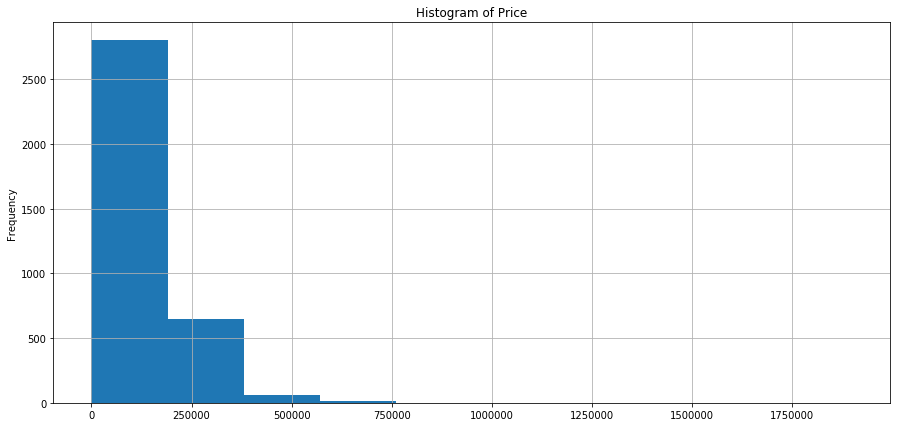

In [9]:
cleanDF["price"].plot(
    kind="hist", grid=True, 
    title="Histogram of Price",
    figsize=(15,7)
)
plt.show()

# Line Graph of Des Moines House Sizes

Next, we were curious to see the variance in size of the homes within Des Moines. We plotted the total_living_area, upper_living_area, and basement_area on a line graph to see how the homes compared with one another. It appears that Des Moines homes range from 900 square feet to close to 7000 square feet total living area.

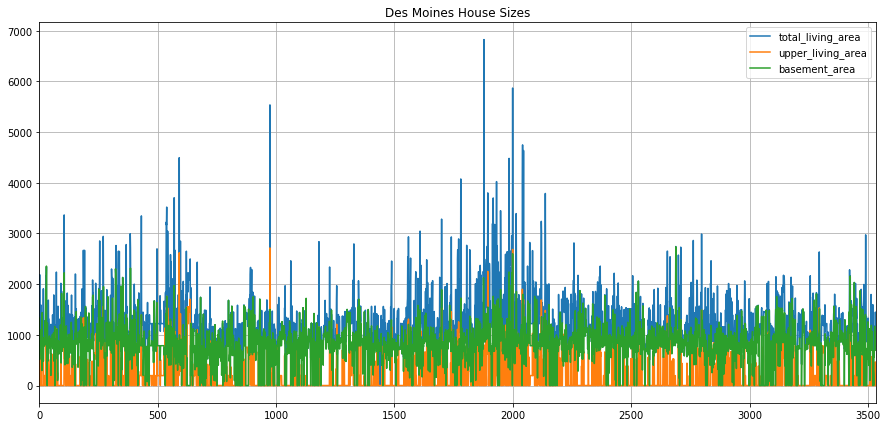

In [10]:
cleanDF[["total_living_area", "upper_living_area", "basement_area"]].plot(
    kind="line", 
    grid=True, 
    legend=True, 
    title="Des Moines House Sizes",
    figsize=(15,7)
)
plt.show()

# Price Vs. Bedrooms Scatterplot

Another aspect of the data that we wanted to explore was how the number of bedrooms affected price. To do this we made a scatter plot with the price and bedrooms variables. It appears that there may be a slight trend of price increasing with more bedrooms, but there also is evidence that this is not the only thing affecting price. For example, many of the three bedroom houses sell for more than their five bedroom counterparts.

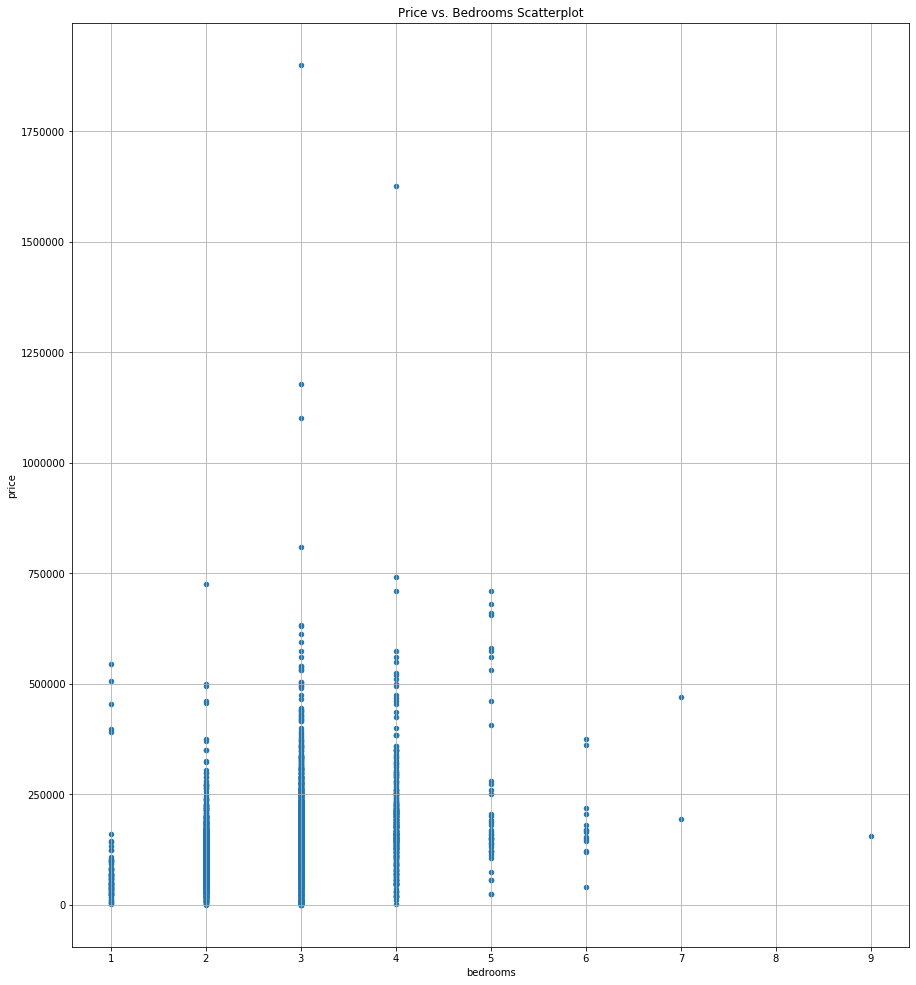

In [11]:
cleanDF.plot(
    kind="scatter",
    x="bedrooms",
    y="price",
    grid=True,
    legend=True,
    title="Price vs. Bedrooms Scatterplot",
    figsize=(15,17)
)
plt.show()

# Price by Neighborhood Horizontal Bar Graph

We were also interested to see what the average price by neighborhood would be.  We grouped the data by neighborhood and got the average price to put into a horizontal bar graph.

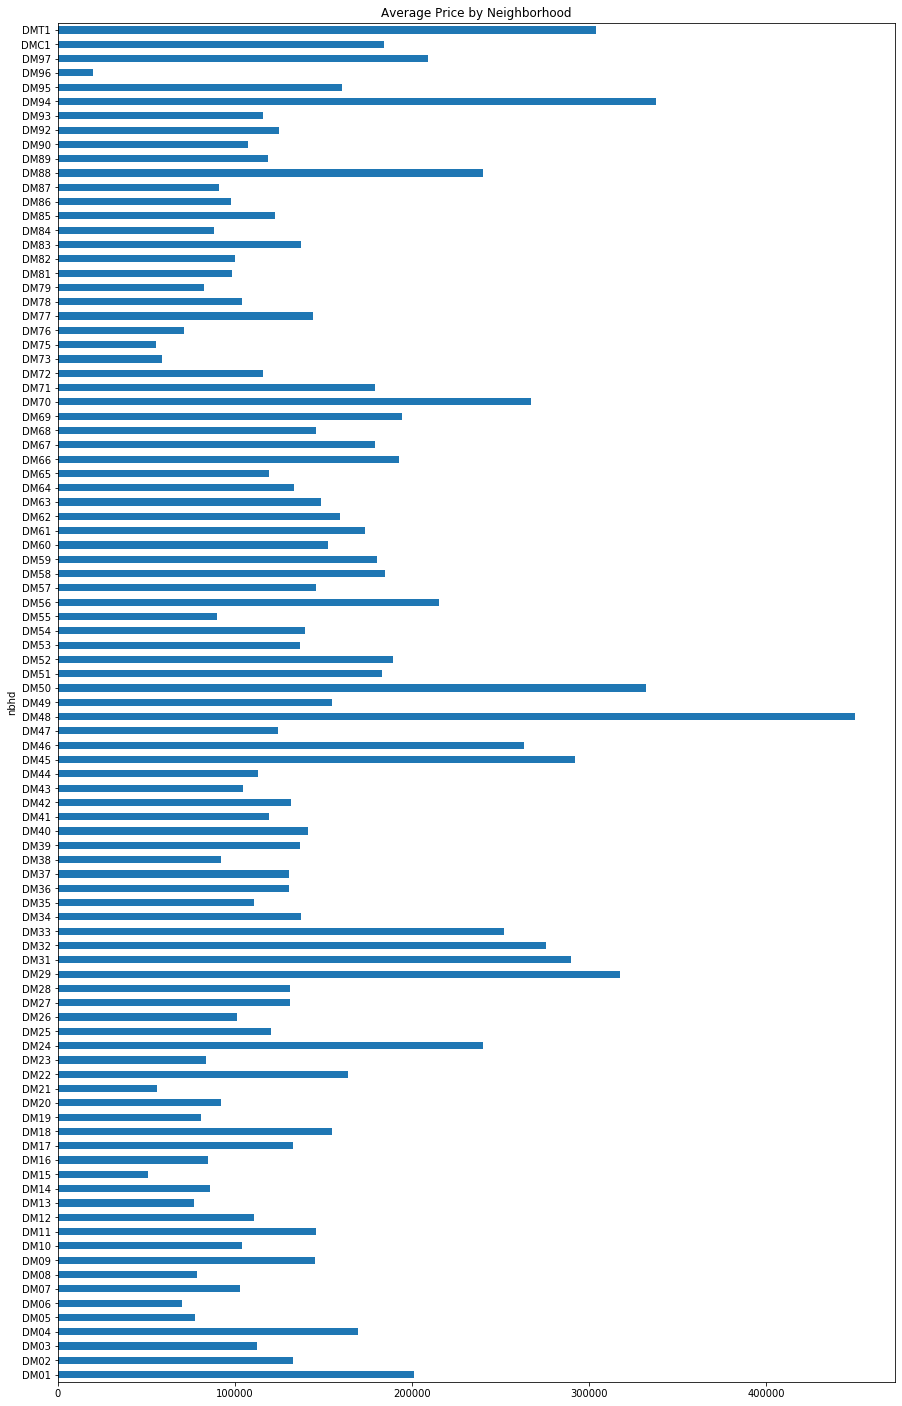

In [12]:
groupnbhd = cleanDF.groupby("nbhd").price.mean()
groupnbhd.plot(kind="barh", title="Average Price by Neighborhood", figsize=(15,25))
plt.show()

# Histogram of Year Built

We wanted to see how old the houses were in Des Moines so we created a histogram based on the year built.  A majority of the house were built in the late 1940s and early 1950s.

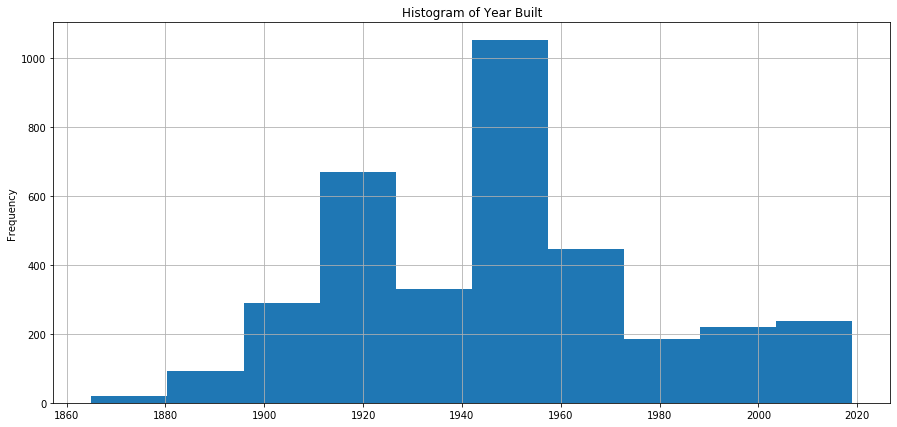

In [13]:
cleanDF["year_built"].plot(
    kind="hist", grid=True, 
    title="Histogram of Year Built",
    figsize=(15,7)
)
plt.show()

# Line Graph of Acres

We thought it would be interesting to see what the land acres were for houses in Des Moines.  While most are well under 10 acres, there are a couple that have more than 10 and even up to almost 50 acres.

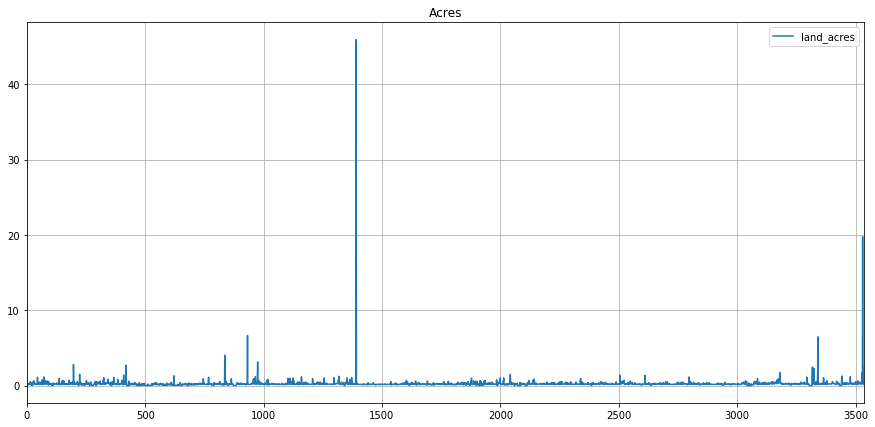

In [14]:
cleanDF["land_acres"].plot(
    kind="line", 
    grid=True, 
    legend=True, 
    title="Acres",
    figsize=(15,7)
)
plt.show()

# Price vs. Garage Stalls Scatterplot

We also thought it would be interesting to see if having a garage or garage size affected house pricing. Two or more garage stalls show a more expensive price compared to zero or one stalls. 

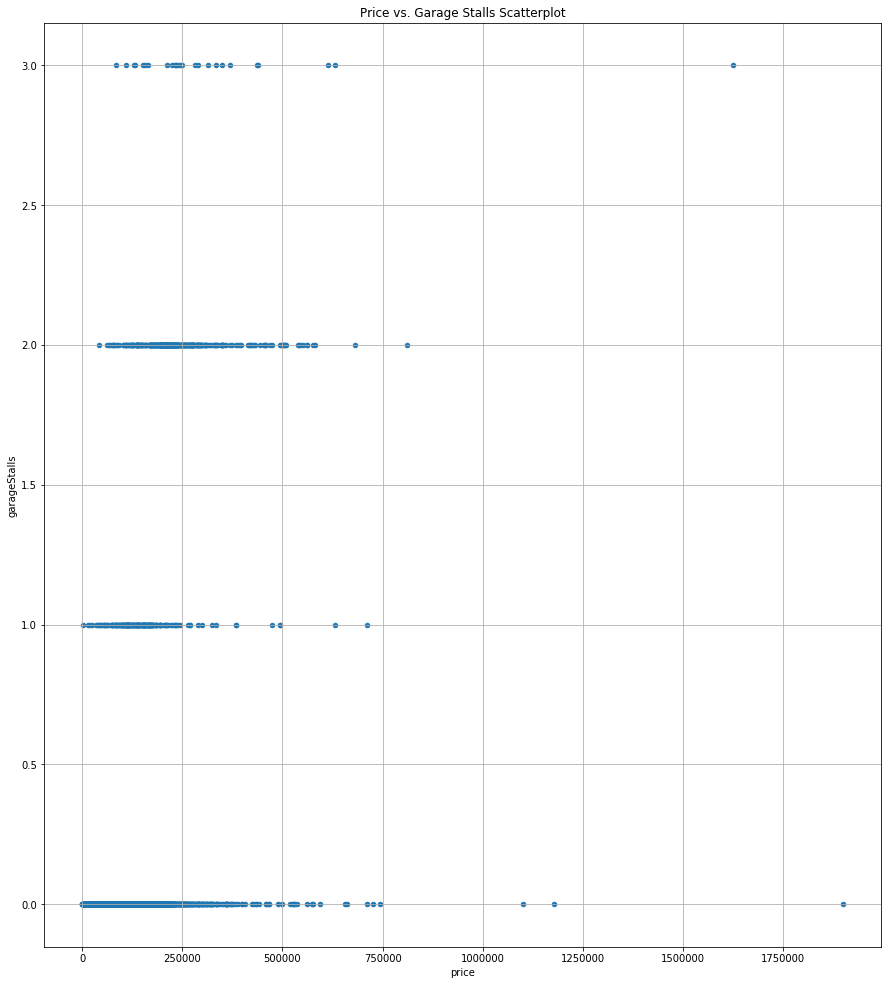

In [15]:
cleanDF.plot(
    kind="scatter",
    x="price",
    y="garageStalls",
    grid=True,
    legend=True,
    title="Price vs. Garage Stalls Scatterplot",
    figsize=(15,17)
)
plt.show()

# Average Price by Residence Type Horizontal Bar Graph

We wanted to see what types of residences were the most expensive. Partial construction, split levels, and two-stories are the most expensive types of residences. 

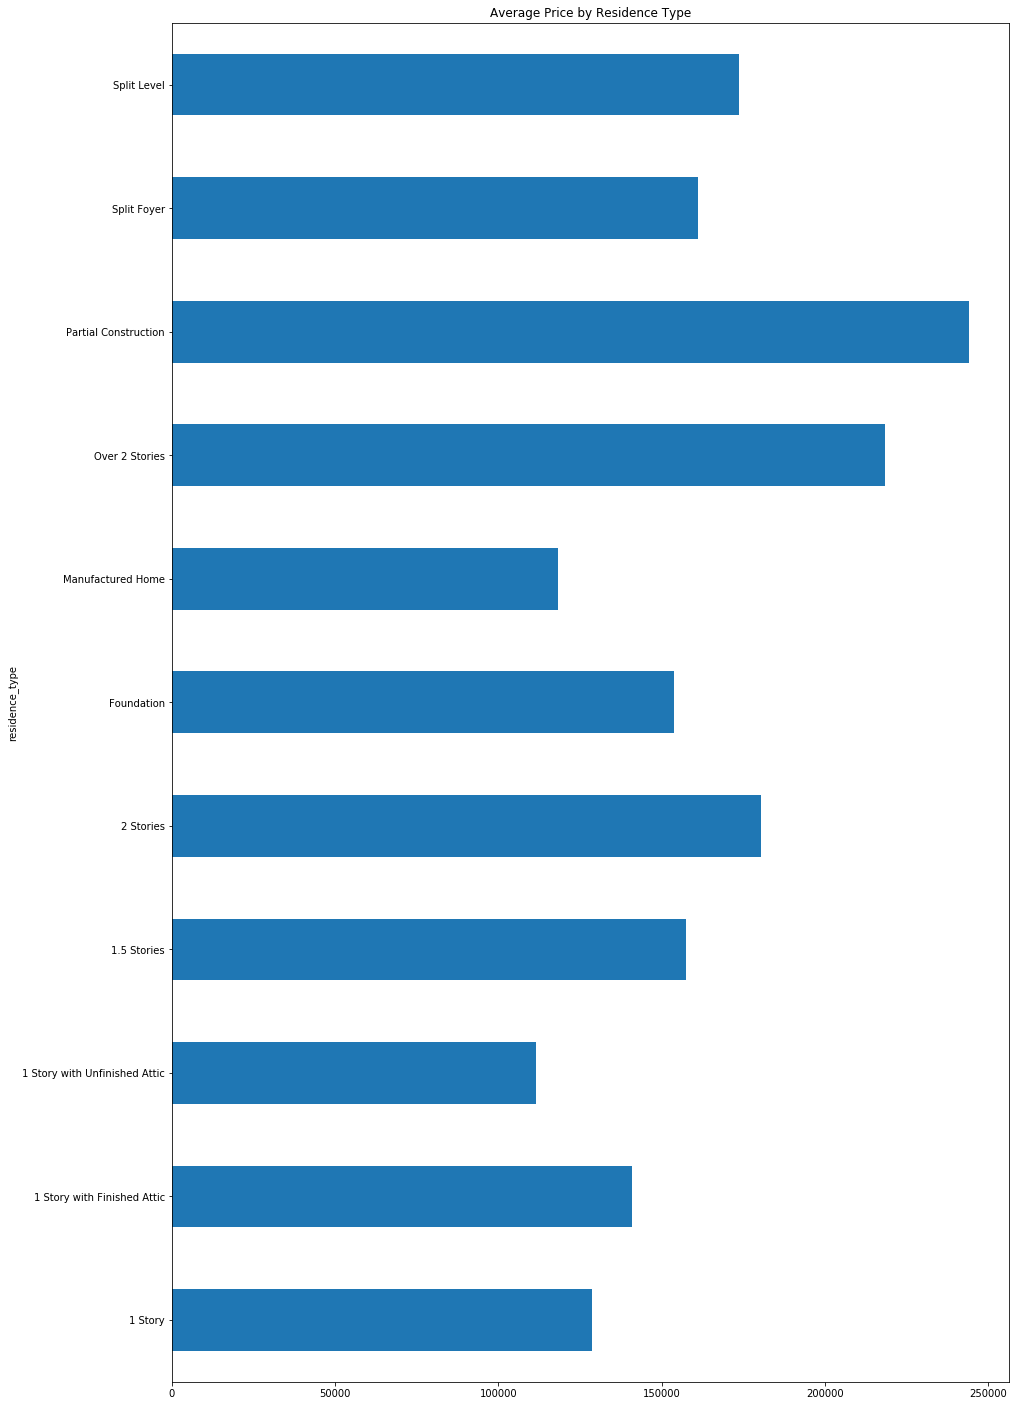

In [16]:
grouprestype = cleanDF.groupby("residence_type").price.mean()
grouprestype.plot(kind="barh", title="Average Price by Residence Type", figsize=(15,25))
plt.show()

# Average Price by Occupancy Horizontal Bar Graph

We also wanted to look at price and occupancy. Townhouses have the highest average price, followed by condos and duplexes. 

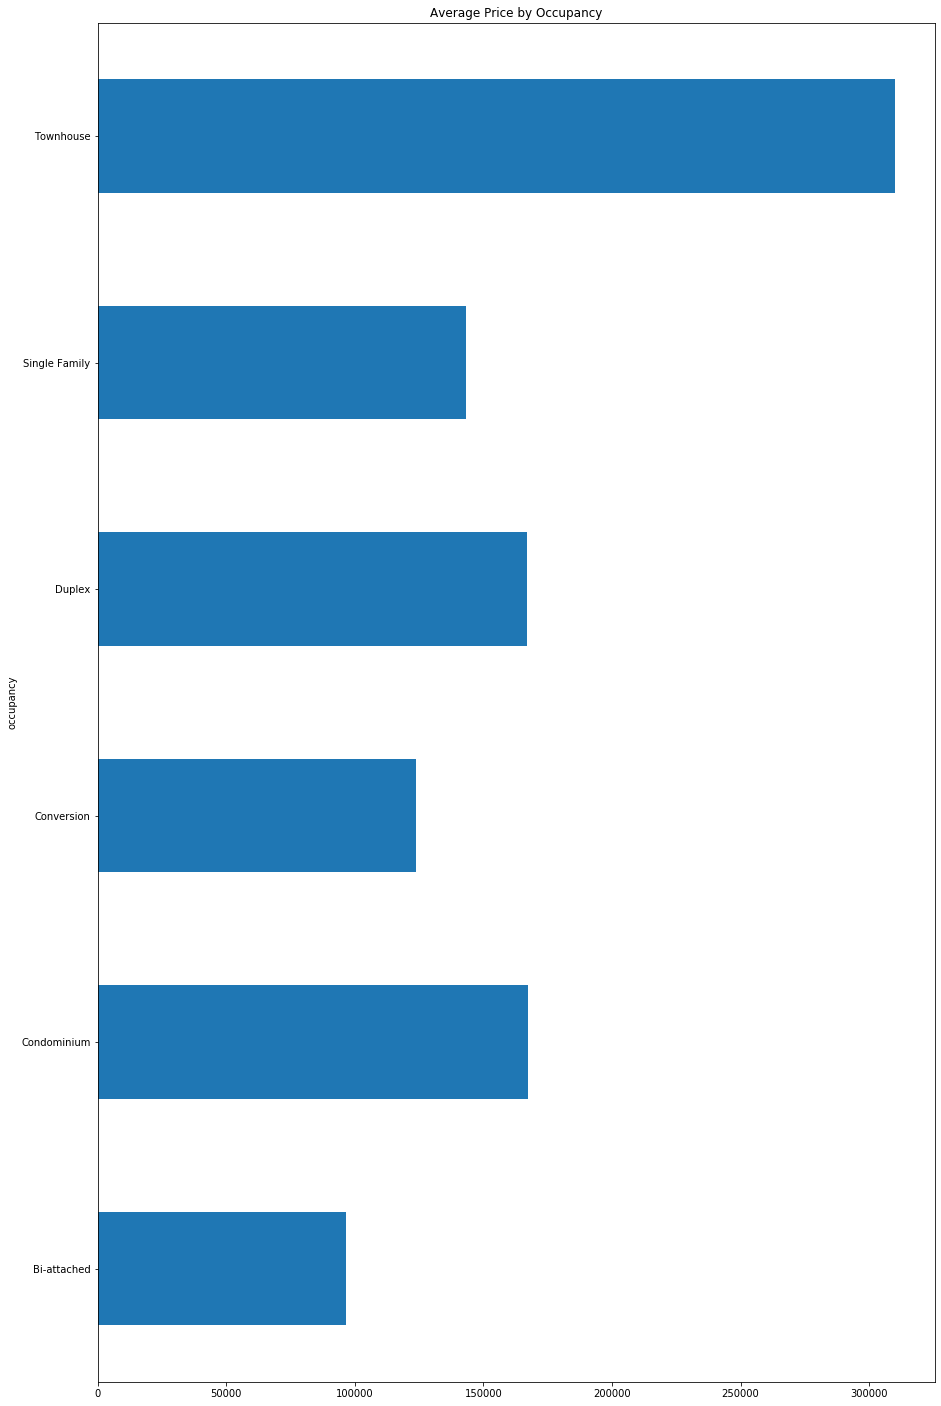

In [17]:
grouprestype = cleanDF.groupby("occupancy").price.mean()
grouprestype.plot(kind="barh", title="Average Price by Occupancy", figsize=(15,25))
plt.show()

# Convert Categorical to Numeric

The last data cleaning operation that we completed was to convert all categorical variables to numeric equivalents

In [18]:
#converting variables to categorical
cleanDF.nbhd = pd.Categorical(cleanDF.nbhd)
cleanDF.nbhd = cleanDF.nbhd.cat.codes

cleanDF.zip = pd.Categorical(cleanDF.zip)
cleanDF.zip = cleanDF.zip.cat.codes

cleanDF.occupancy = pd.Categorical(cleanDF.occupancy)
cleanDF.occupancy = cleanDF.occupancy.cat.codes

cleanDF.residence_type = pd.Categorical(cleanDF.residence_type)
cleanDF.residence_type = cleanDF.residence_type.cat.codes

cleanDF.roof_material = pd.Categorical(cleanDF.roof_material)
cleanDF.roof_material = cleanDF.roof_material.cat.codes

cleanDF.foundation = pd.Categorical(cleanDF.foundation)
cleanDF.foundation = cleanDF.foundation.cat.codes

cleanDF.condition = pd.Categorical(cleanDF.condition)
cleanDF.condition = cleanDF.condition.cat.codes

cleanDF.heating = pd.Categorical(cleanDF.heating)
cleanDF.heating = cleanDF.heating.cat.codes

cleanDF.head()

,nbhd,price,zip,land_acres,occupancy,residence_type,roof_material,main_living_area,upper_living_area,total_living_area,foundation,basement_area,fin_bsmt_area_tot,deck_area,bathrooms,whirlpools,hottubs,saunas,fireplaces,bedrooms,rooms,year_built,year_remodel,condition,heating,air_conditioning,isWalkout,garageStalls
0,26,104000,7,0.170,4,0,0,1332.0,0.0,1332.0,1,1332.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,1955.0,0.0,3,2,100.0,0,0
1,26,124560,7,0.191,4,10,0,1274.0,912.0,2186.0,1,514.0,0.0,512.0,3.0,0.0,0.0,0.0,1.0,3.0,5.0,1982.0,0.0,3,2,100.0,0,2
2,26,136000,7,0.191,4,10,0,1274.0,912.0,2186.0,1,514.0,0.0,512.0,3.0,0.0,0.0,0.0,1.0,3.0,5.0,1982.0,0.0,3,2,100.0,0,2
3,26,132500,7,0.170,4,4,0,812.0,560.0,1372.0,2,812.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,5.0,1910.0,2013.0,3,2,100.0,0,0
4,26,65340,7,0.170,4,4,0,812.0,560.0,1372.0,2,812.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,5.0,1910.0,2013.0,3,2,100.0,0,0
